### Importing Libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
import tensorflow as tf
tf.__version__

'2.2.0-rc3'

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [25]:
y_train.shape

(50000, 1)

In [26]:
y_train[0]

array([6], dtype=uint8)

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


### Building the model


In [0]:
model=Sequential()

In [0]:
model.add(BatchNormalization(input_shape = (32,32,3)))

In [0]:
model.add(Convolution2D(32,3,3,input_shape=(32,32,3),activation='relu',padding='same'))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))

In [0]:
model.add(Dropout(0.2))

In [0]:
model.add(Convolution2D(64,3,3,activation='relu',padding='same'))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))

In [0]:
model.add(Dropout(0.2))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 64)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 1, 64)         

### Image Preprocessing


In [40]:
model.fit(x_train,y_train,batch_size=32,epochs=25,validation_data=(x_test,y_test))

Epoch 1/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7187 - accuracy: 0.3755 - val_loss: 1.4251 - val_accuracy: 0.4855
Epoch 2/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4896 - accuracy: 0.4613 - val_loss: 1.3267 - val_accuracy: 0.5263
Epoch 3/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4144 - accuracy: 0.4909 - val_loss: 1.2704 - val_accuracy: 0.5525
Epoch 4/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3614 - accuracy: 0.5120 - val_loss: 1.2379 - val_accuracy: 0.5611
Epoch 5/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3248 - accuracy: 0.5234 - val_loss: 1.2085 - val_accuracy: 0.5744
Epoch 6/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3020 - accuracy: 0.5331 - val_loss: 1.1755 - val_accuracy: 0.5789
Epoch 7/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2807 - accuracy: 0.5431 - val_loss: 1.1507 - val_accuracy:

### Checking Test Accuracy

In [41]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0702 - accuracy: 0.6231


In [42]:
test_loss, test_accuracy = model.evaluate(x_train, y_train)

1563/1563 [==============================] - 3s 2ms/step - loss: 0.9487 - accuracy: 0.6716





### Train Accuracy 67% and Test Accuracy is 62%


In [43]:
num_classes = len(np.unique(y_train))
num_classes

10

### Saving and Testing the model

airplane : 0
automobile : 1
bird : 2
cat : 3
deer : 4
dog : 5
frog : 6
horse : 7
ship : 8
truck : 9

In [0]:
model.save('cifar10.h5')

In [0]:
from tensorflow.keras.models import load_model

In [0]:
classifier=load_model('cifar10.h5')

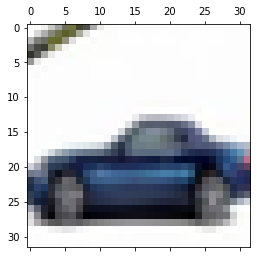

In [47]:
plt.matshow(x_test[105])

In [0]:
prediction=model.predict(x_test)

In [49]:
pr=prediction[105]
np.argmax(pr)

1

In [50]:
y_test[105]

array([1])

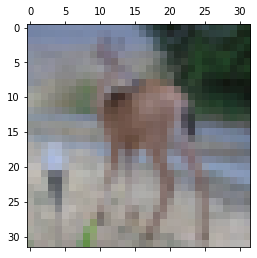

In [51]:
plt.matshow(x_test[100])

In [52]:
pr=prediction[100]
np.argmax(pr)

4

In [53]:
y_test[100]

array([4])